In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

random_state = 42

#### (a)

In [4]:
# load data
data = pd.read_csv('data/winequality-red.csv', sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### (b)

In [9]:
# prcoess and split dataset
features = [col for col in data.columns if col != "quality"]
target = "quality"

# split data into features and target and convert to numpy arrays
X = np.array(data[features])
y = np.array(data[target])

# split ratios
train_ratio = 0.75
val_ratio = 0.15
test_ratio = 0.10

# Use train_test_split to split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + val_ratio), random_state=random_state) 

# standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print("Train: ", X_train.shape, y_train.shape)
print("Val: ", X_val.shape, y_val.shape)
print("Test: ", X_test.shape, y_test.shape)

Train:  (1199, 11) (1199,)
Val:  (240, 11) (240,)
Test:  (160, 11) (160,)


#### (c)

In [14]:
# linear regression closed-form solution w = (X^TX)^-1X^Ty
def closed_form_linear_regression(X, y):
    # add bias term to X
    X = np.c_[np.ones(X.shape[0]), X]

    # calculate closed-form solution
    X_T = np.transpose(X)
    XTX = X_T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    XTX_inv_X_T = XTX_inv.dot(X_T)
    w = XTX_inv_X_T.dot(y)
    return w

w = closed_form_linear_regression(X_train, y_train)

#### (d)

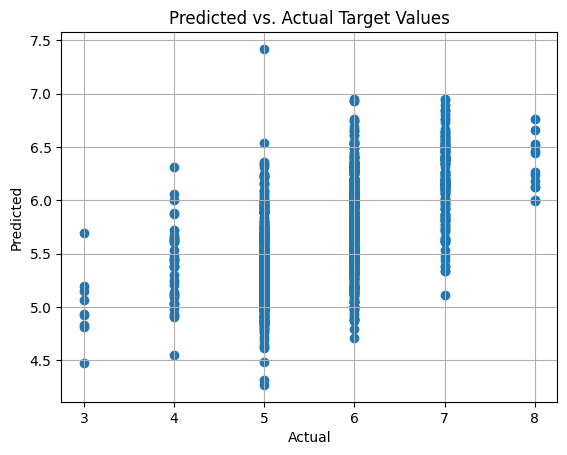

In [16]:
# make predictions on training data
def predict(X, w):
    X = np.c_[np.ones(X.shape[0]), X]
    return X.dot(w)
y_train_pred = predict(X_train, w)

# generate plot
def plot_pred_vs_actual(y_pred, y_true): 
    plt.scatter(y_true, y_pred, label='Predicted vs. Actual')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title('Predicted vs. Actual Target Values')
    plt.grid(True)
    plt.show()

plot_pred_vs_actual(y_train_pred, y_train)

From the plot, we can see that the predicted values follow a general positive linear trend with the actual values. However, there is significant variance in the predicted values as shown by the spread of the points for each actual integer value. This indicates that the linear regression model is not able to make accurate predictions and a multiclass classification formulation might be better suited for the problem. Moreover, the predicted values have bigger bias especially for the lower actual values (3 and 4) as well as the higher actual values (7 and 8); this is likely due to the fact that there are a lot of data points with 5 and 6 quality ratings influencing the linear regression model. 

#### (e)

In [17]:
# root mean square error on y_pred y_true
def rmse(y_pred, y_true):
    return np.sqrt(np.mean((y_pred - y_true) ** 2))

rmse_train = rmse(y_train_pred, y_train)
rmse_test = rmse(predict(X_test, w), y_test)
print("RMSE Train: ", rmse_train)
print("RMSE Test: ", rmse_test)

RMSE Train:  0.653772627640322
RMSE Test:  0.6114989918075563


#### (f)

In [18]:
# LMS algorithm for linear regression
def lms_linear_regression(X, y, learning_rate=0.001, epochs=1000):
    X = np.c_[np.ones(X.shape[0]), X]

    # initialize weights
    np.random.seed(random_state)
    w = np.random.randn(X.shape[1]) 
    
    # LMS algorithm
    for epoch in range(epochs):
        # shuffle data for each epoch
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        X_epoch = X[indices]
        y_epoch = y[indices]

        # loop through each data point and update weights
        for i in range(X.shape[0]): 
            X_i = X_epoch[i]
            y_i = y_epoch[i]

            # calculate prediction
            y_pred = X_i.dot(w)

            # calculate error
            error = y_pred - y_i

            # update weights
            w -= learning_rate * error * X_i

    return w

learning_rate = 0.0005
w_lms = lms_linear_regression(X_train, y_train, learning_rate=learning_rate)

#### (g)

In [19]:
# report RMSE on training and test data
rmse_train = rmse(predict(X_train, w_lms), y_train)
rmse_test = rmse(predict(X_test, w_lms), y_test)
print("RMSE Train: ", rmse_train)
print("RMSE Test: ", rmse_test)

RMSE Train:  0.653912403096097
RMSE Test:  0.6116256143416187
